In [41]:
## Basic imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
##modelling import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 ##Pipeline imports
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder


## Read Dataset as DataFrame

In [42]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,Age,Gender,Hypertension,Work Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0.0,Self-employed,130.91,22.37,Non-smoker,Social Drinker,Moderate,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0.0,Self-employed,183.73,32.57,Non-smoker,Never,Low,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,0.0,Never Worked,189.00,20.32,Formerly Smoked,Rarely,High,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0.0,Never Worked,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,0.0,Self-employed,177.34,29.06,Currently Smokes,Rarely,Low,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [43]:
df.Diagnosis.value_counts()

Diagnosis
No Stroke    7532
Stroke       7468
Name: count, dtype: int64

In [44]:
df.Diagnosis.value_counts(normalize=True)*100

Diagnosis
No Stroke    50.213333
Stroke       49.786667
Name: proportion, dtype: float64

In [45]:
df.Diagnosis = (df.Diagnosis.str.strip().str.lower() == 'stroke').astype(int)

## Split the dataset

In [46]:
X=df.drop('Diagnosis',axis=1)
y=df[['Diagnosis']]

In [47]:
y.value_counts()

Diagnosis
0            7532
1            7468
Name: count, dtype: int64

## split the dataset into train_test_split

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## define numeric and cateorical columns

In [49]:
numerical_columns=X.select_dtypes(exclude='object').columns
numerical_columns

Index(['Age', 'Hypertension', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stress Levels'],
      dtype='object')

In [50]:
categorical_columns=X.select_dtypes(include='object').columns
categorical_columns



Index(['Gender', 'Work Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Family History of Stroke', 'Dietary Habits',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms'],
      dtype='object')

## Creating the Preprocessing Pipeline

In [51]:
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
        
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_columns),
        ('categorical_columns',cat_pipeline,categorical_columns)
    ]
)

In [52]:
X_train=preprocessor.fit_transform(X_train)
X_train

array([[ 0.14127454,  0.        ,  0.63758318, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23630759,  0.        ,  1.4852178 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.52395678,  0.        , -0.36304157, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.38140721,  0.        ,  1.46467058, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47428724,  0.        , -1.14606386, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33134063,  0.        , -1.10422675, ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
X_test=preprocessor.transform(X_test)
X_test

array([[ 0.80650586,  0.        ,  0.27491241, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95160548,  0.        , -1.44461741, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.7093198 ,  0.        ,  1.66345873, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.90408896,  0.        ,  1.35747847, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14127454,  0.        , -1.70975078, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42892373,  0.        , -0.58212937, ...,  0.        ,
         0.        ,  0.        ]])

## Training the Logistic Regression

In [54]:

model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.4903

## Performance metrics of logistic regression

In [55]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
auc


np.float64(0.48877619920351667)

## Performance on train dataset

In [56]:
y_pred_train=model.predict(X_train)
acc_train=accuracy_score(y_train,y_pred_train)
acc_train


0.9403333333333334

# Check for overfitting and underfitting

In [57]:
print(f'testing accuracy score:{acc}')
print(f'training accuracy score:{round(acc_train,4)}')



testing accuracy score:0.4903
training accuracy score:0.9403


## let me tune the C values since the default value is always 1

In [58]:
model=LogisticRegression(C=100,solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.4863

# Compare model accuracy with null accuracy

In [59]:
df.Diagnosis.value_counts()

Diagnosis
0    7532
1    7468
Name: count, dtype: int64

In [60]:
null_accuracy=7532/(7532+7468)
round(null_accuracy,4)

0.5021

## We can see that our model accuracy score is 0.5113 but null accuracy score is 0.5021. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[711, 770],
       [771, 748]])

# Decision Trees
First we are going to get the default model performance and then we are going to tune it using the following parameters:

- max_depth
- min_samples_leaf

In [63]:

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
print(f'accuracy score decision tree :{round(auc,4)}')

accuracy score decision tree :0.5125


## let me tune the max_depth

In [64]:
depths = [2, 3, 4, 5, 6]
for d in depths:
    dt=DecisionTreeClassifier(max_depth=d,random_state=1)
    dt.fit(X_train,y_train)
    y_pred=dt.predict_proba(X_test)[:,0]
    score=roc_auc_score(y_test,y_pred)
    print(d,score)
    

2 0.5000506747971564
3 0.5000506747971564
4 0.49112746533999463
5 0.4907791872384858
6 0.49159265108757444


## let me tune the min_leaf

In [65]:
depths = [2,3,4]
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]
scores=[]
for d in depths:
    for s in sample_leafs:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred=dt.predict_proba(X_test)[:,1]
        score=roc_auc_score(y_test,y_pred)
        scores.append((d,s,round(score,4)))

<Axes: xlabel='depth', ylabel='leaf'>

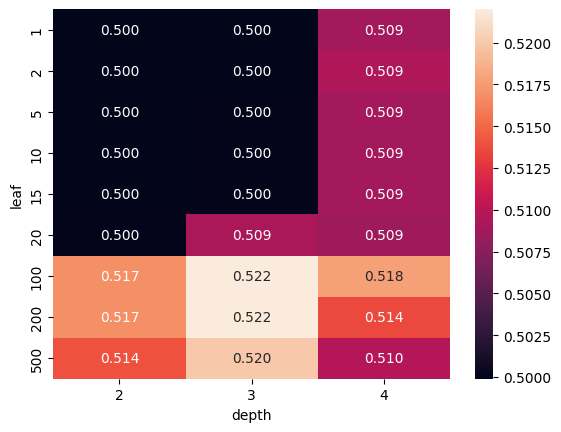

In [66]:
df_scores=pd.DataFrame(scores,columns=['depth','leaf','score'])
sns.heatmap(df_scores.pivot(index='leaf',columns='depth',values='score'),fmt='.3f',annot=True)

## Random Forest
As we did with the Decision Tree model, we are going to try the Random Forest model with default parameters and tune it using:

- n_estimators
- max_depth
- min_sample_leaf

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
y_pred=rf.predict_proba(X_test)[:,1]
score=roc_auc_score(y_test,y_pred)
print(f'Auc ')

Auc 


## Now we can try with different n_estimators values to see the best choice

In [68]:
scores=[]
for e in range(10,50,10):
    rf=RandomForestClassifier(n_estimators=e,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test,y_pred)
    scores.append((e,round(auc,2)))
    

In [69]:
df_scores=pd.DataFrame(scores,columns=['n_estimatores','auc'])
df_scores

,n_estimatores,auc
0,10,0.50
1,20,0.50
2,30,0.49
3,40,0.51


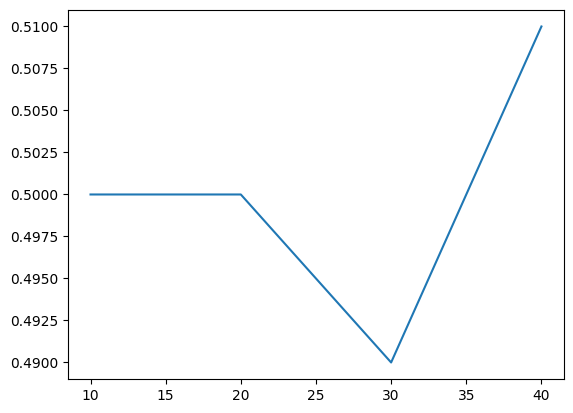

In [70]:
plt.plot(df_scores.n_estimatores,df_scores.auc)

## Looking at the results table and the chart we see that a n_estimator=50 would be ideal, since after that there is no real considerable impact over the auc score.

- Now we can tune the max_depth parameter

In [71]:
scores = []

for d in [5, 6, 7, 10, 15]:
        for e in range(10, 50, 10):
            rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=d)
            rf.fit(X_train, y_train)
        
            y_pred = rf.predict_proba(X_test)[:,1]
            auc = roc_auc_score(y_test, y_pred)
            scores.append((d,e,auc))

df_scores = pd.DataFrame(scores, columns=['depth','n_estimators','auc'])
df_scores

,depth,n_estimators,auc
0,5,10,0.505832
1,5,20,0.505832
2,5,30,0.505832
3,5,40,0.505832
4,6,10,0.500627
5,6,20,0.500627
6,6,30,0.500627
7,6,40,0.500627
8,7,10,0.503041
9,7,20,0.503041


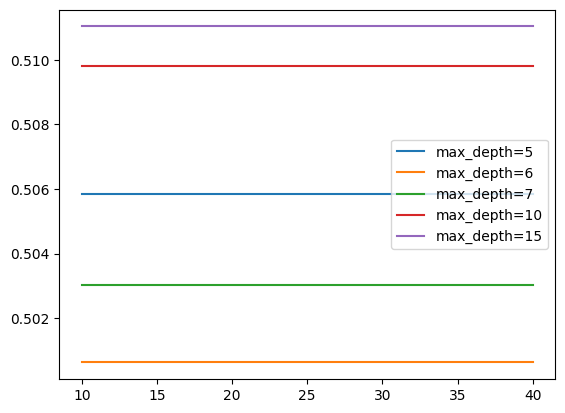

In [72]:
for d in [5, 6, 7, 10, 15]:
    df_subset = df_scores[df_scores.depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth=%d" % d)
plt.legend()

- Based on this result we clearly see that a max_depth=10 is the best option.

- Final step: tune the min_sample_leaf parameter

In [73]:
scores = []

for s in [1, 5, 10, 20, 50]:
        for e in range(10, 50, 10):
           rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=10, min_samples_leaf=s)
           rf.fit(X_train, y_train)
        
           y_pred = rf.predict_proba(X_test)[:,1]
           auc = roc_auc_score(y_test, y_pred)
           scores.append((s, e,auc))

df_scores = pd.DataFrame(scores, columns=['sample_leaf','n_estimators','auc'])
df_scores

,sample_leaf,n_estimators,auc
0,1,10,0.509814
1,1,20,0.509814
2,1,30,0.509814
3,1,40,0.509814
4,5,10,0.511721
5,5,20,0.511721
6,5,30,0.511721
7,5,40,0.511721
8,10,10,0.501365
9,10,20,0.501365


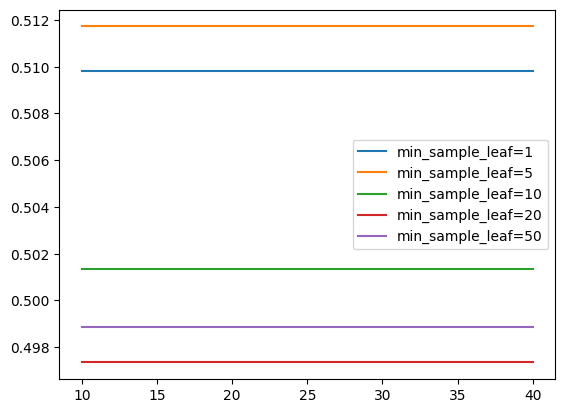

In [74]:
for s in [1, 5, 10, 20, 50]:
    df_subset = df_scores[df_scores.sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="min_sample_leaf=%d" % s)
plt.legend()

# Based on these results, the best parameters would be:

- n_estimators=100
- max_depth=10
- min_sample_leaf=1
- With these parameters lets get the final auc score

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=10, min_samples_leaf=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
print(f'roc_auc_score:{round()})

np.float64(0.5185029686985334)

In [76]:
import xgboost as xgb

In [78]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [79]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [82]:
y_pred = model.predict(dtest)
auc=roc_auc_score(y_test, y_pred)
print(f'roc_auc_score:{round(auc,4)}')

roc_auc_score:0.5211


## Based on Performance for Model Training my best model was Xgboost with roc_auc_score of 0.5211 which is fairly good hence i will saved this model for deployment purposes